<a href="https://colab.research.google.com/github/eojo91/ds2_2023_summer_ml_project1/blob/main/DataMining_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 데이터과학 HW

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import uniform, norm, binom, chi2
from scipy.stats import t
from sklearn.model_selection import train_test_split
from collections import Counter

####1.기댓값 계산

######**[sol]**

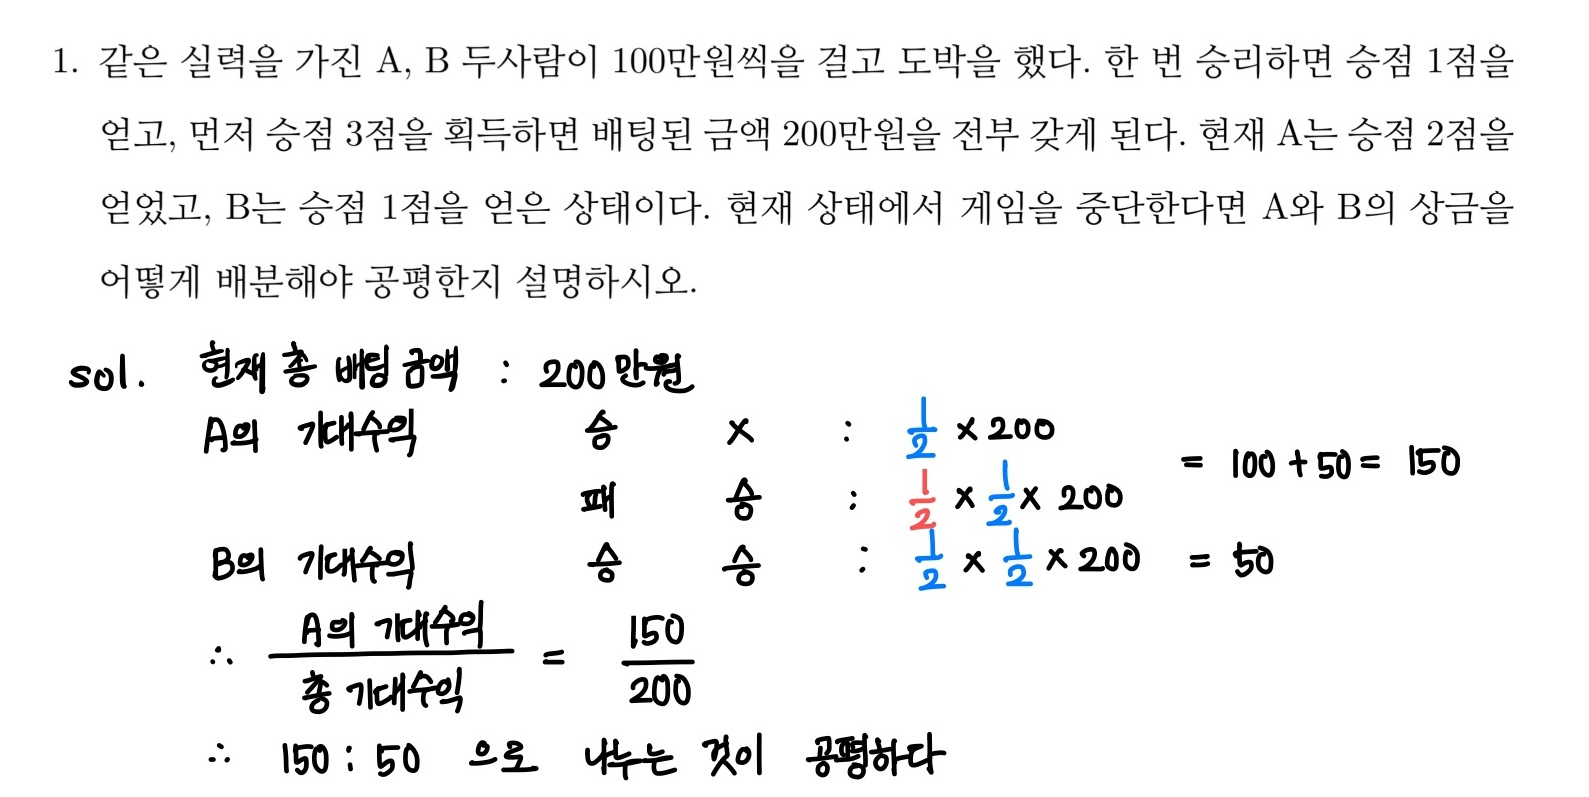

####2.조건부 확률 계산

######**[sol]**

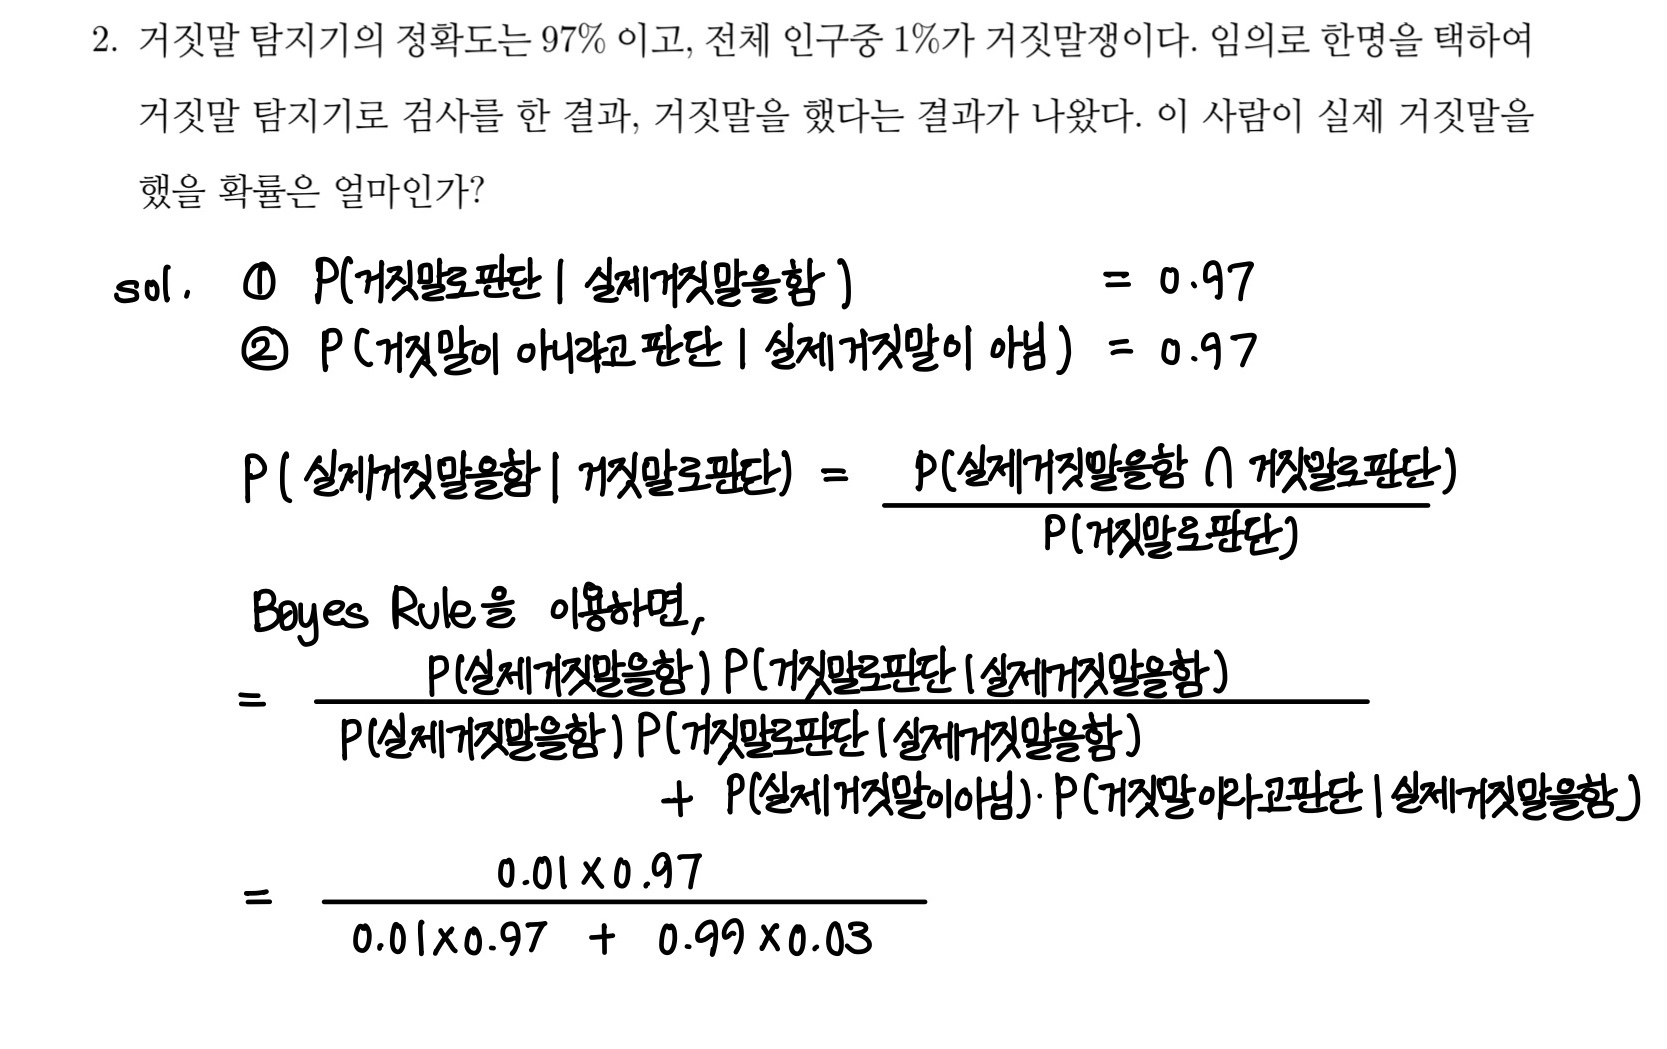

#### 3.임의 표본 추정

각각의 분포에서 표본을 1000개 생성하고, 이 데이터를 이용하여 왜도(skewness), 첨도(kurtosis)를 추정하시오.

표본 평균 $\bar{x} = {1\over{n}}\sum_{i=1}^n x_i$

표본 분산 $s^2 = {1\over{n-1}}\sum_{i=1}^n (x_i - \bar{x})^2$

표본 왜도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^3$

표본 첨도 = ${1\over{n-1}}\sum_{i=1}^n({{x_i-\bar{x}}\over{s}})^4$

---


#####(a) 왜도(Skewness)

왜도(skewness): 분포가 한쪽으로 치우친 정도를 측정하는 통계량

i. **N(0,2)** 과 𝒳(**5**) 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 왜도를 구하시오.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm, chi2
from scipy.stats import skew


normal_sample = norm.rvs(loc = 0, scale= 2, size=1000)
chi_sample = chi2.rvs(5, size=500)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,4))
ax1.hist(x=normal_sample, bins='auto', alpha=0.7)
ax1.set_title('N(0,2) sample')
ax1.set_ylim([0,120])

ax2.hist(x=chi_sample, bins='auto', alpha=0.7)
ax2.set_title('chi(5) sample')
ax2.set_ylim([0,120])
fig.show()

print(f'N(0,2)의 왜도: {skew(normal_sample)}')
print(f'chi(5)의 왜도: {skew(chi_sample)}')

#####(b) 첨도

첨도(Kurtosis): 이상치가 얼마나 존재하는지를 측정하는 통계량

i. 자유도가 1인 t분포, 자유도가 10인 t분포와 표준정규분포(N(0,1))에서 표본을 생성한 후, 분포를 그리시오.

ii. 각 분포에서 첨도를 구하시오.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import kurtosis
from scipy.stats import t, norm

t_sample_1 = t.rvs(df=1, size=1000)
t_sample_10 = t.rvs(df=10, size=1000)
snormal_sample = norm.rvs(loc=0, scale=1, size=1000) # 정규분포

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_xlim(-20, 20)
ax1.set_ylim(0, 150)
ax1.hist(t_sample_1, bins='auto', alpha=0.7)
ax1.set_title(r'df=1 $t$-distribution')

ax2.set_xlim(-5, 5)
ax2.set_ylim(0, 150)
ax2.hist(t_sample_10, bins='auto', alpha=0.7)
ax2.set_title(r'df=10 $t$-distribution')

ax3.set_ylim(0, 150)
ax3.hist(snormal_sample, bins='auto', alpha=0.7)
ax3.set_title(r'N(0,1) normal distribution')

fig.show()

print(r'df=1 t-distribution kurtosis:', kurtosis(t_sample_1))
print(r'df=10 t-distribution kurtosis:', kurtosis(t_sample_10))
print(r'N(0,1) normal distribution kurtosis:', kurtosis(snormal_sample))

#### 4.랜덤워크

$X_i \overset{i.i.d}{\sim} U(-1, 1)$ 일 때, $S_n = X_1 + \cdots + X_n$ 인 랜덤워크에 대해서 고려하자.

독립적으로 생성된 두 개의 랜덤워크 $\{S_n : n = 1, \cdots , 10000\}$ 과 $\{S_n' : n = 1, \cdots , 10000\}$ 의 상관계수를 구하시오.

In [ ]:
import numpy as np
from scipy.stats import uniform

uniform_sample1 = uniform.rvs(loc = -1, scale = 2, size = 10000)
uniform_sample2 = uniform.rvs(loc = -1, scale = 2, size = 10000)

random_walk1 = np.array([])
random_walk2 = np.array([])

for i in range(10000):
  random_walk1 = np.append(random_walk1, uniform_sample1[0:i+1].sum())
  random_walk2 = np.append(random_walk2, uniform_sample2[0:i+1].sum())

np.corrcoef(random_walk1, random_walk2)

#### 5.모비율 검정

로또는 45개의 숫자 중에서 6개의 당첨 번호를 추첨한다. 10번의 모의실험을 통해 당첨번호를 추출 한 후, 각 번호가 나올 확률이 동일한지를 검정하려고 한다. 다음의 절차를 따르시오.

(이 때 i번째 공이 당첨번호에 포함될 확률을 $p_i$라고 하자.)

---


(a) 각 번호가 나올 확률이 동일하다고 가정하고 로또 당첨 번호를 10회 추출하시오.

In [ ]:
import numpy as np

winning_tickets= [np.random.choice(range(1, 46), size=6, replace=False) for i in range(10)]
winning_tickets

(b) 10개의 표본을 통해 각 i번째 공이 당첨 번호에 포함 될 확률 $\hat{p}_i$ 를 추정하시오.

In [ ]:
winning_tickets = np.array(winning_tickets).reshape(-1)
count_numbers = np.bincount(winning_tickets)[1:] # np.bincount() : 0부터 시작하는 정수 배열에 대해 각 숫자의 발생 빈도를 계산

# 나오지 않는 숫자가 있을수 있으므로 크기가 45가 되도록 0으로 패딩
if len(count_numbers) < 45:
    count_numbers = np.pad(count_numbers, (0, 45 - len(count_numbers)), mode='constant')

#print(count_numbers)

# 각 i번째 공의 당첨 확률을 계산하여 출력
prob_arr=np.array([])

for i in range(len(count_numbers)):
    prob_arr = np.append(prob_arr, count_numbers[i] / len(winning_tickets))

print(prob_arr)

# for i, prob in enumerate(prob_arr, start=1):
#     print(f"{i}번 공 확률: {prob:.8f}")

# enumerate(iterable, start=1) : 반복 가능한(iterable) 객체(리스트, 튜플, 문자열 등)를 받아 인덱스와 해당 요소를 함께 반환하는 iterator를 생성
#                              : start는 인덱스의 시작값을 의미하며 기본값은 0, 1로 할 경우 실제 데이터는 0부터 있지만 1부터 시작하는것처럼 할수 있음.

(c) 각 i에 대해 다음의 검정을 시행하시오. p-value가 0.05보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45$ vs $H_1 : p_i > 6/45$

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

pval_arr = np.array([])

for i in range(len(count_numbers)):
    z_stats, p_val = proportions_ztest(count_numbers[i], nobs=10, value=6/45, alternative= "larger")
    print(f"{i+1}번째 공 z-stats : {z_stats:.4f}, p-value : {p_val:.4f} ")
    pval_arr = np.append(pval_arr, p_val)

print('p-value가 0.05보다 작은 경우는 ', (pval_arr < 0.05).sum(), '개 입니다.')

(d) 본페르니 교정을 이용하여, 다중 검정을 시행하시오. p-value가 0.05/45보다 작은 경우는 몇 개 있는가?

> $H_0 : p_i = 6/45, ∀i$ vs $H_1$ : 어떤 i에 대해서 $p_i > 6/45$ 을 만족한다.

In [ ]:
print('p-value가 0.05/45 보다 작은 경우는 ', (pval_arr < 0.05/45).sum(), '개 입니다.')

[참고]   
본페르니 교정(Bonferroni correction)은 다중 비교를 할 때 제1종 오류의 확률을 제어하기 위한 방법 중 하나
* 제1종 오류 : 실제로는 차이나 효과가 없는데 데이터의 샘플링 변동 등의 이유로인해 차이나 효과가 있다고 잘못 결론 내리는 오류
* 다중 비교 문제는 여러 개의 독립적인 가설 검정을 동시에 수행할 때 각각의 검정에서 제1종 오류의 위험이 누적되므로  
  이를 제어하지 않으면 전체적인 제1종 오류의 확률이 크게 증가함.  
* 본페르니 교정은 이러한 문제를 해결하기 위한 방법 중 하나로, 원래의 유의수준을 전체 검정 횟수로 나눈 값을 새로운 유의수준으로 사용하는 방법임.

본페르니 교정은 매우 보수적인 방법으로, 이 방법을 사용할 경우
제1종 오류의 위험은 크게 줄어들지만, 제2종 오류의 위험(실제로 차이나 효과가 있지만 그렇지 않다고 결론 내리는 오류)은 증가할 수 있음


#### 6.p-value 계산
스웨인 대 알리바마 재판에서 귀무 가설은 '공정한 배심원 선택' 이고 대립가설은 '불공정한 배심원 선택'이다. 전체 인구 중 26%가 흑인이다. 우리는 100명을 뽑았을 때, 8명의 흑인이 선택되었다는 데이터를 관찰하였다. 이 경우 p-value를 구하여라.

(hint: 이항분포의 누적분포함수 또는 확률질량함수를 이용하시오.)



> $H_0 : \mu = \mu_0$ vs $H_1 : \mu > \mu_0$


검정통계량 $Z = \dfrac{\bar{X} - \mu_0}{\frac{\sigma}{\sqrt{n}}}\sim N(0,1)\; (H_0 \text{가 참일 때})$


z : 실제 관측된 검정통계량 값

P-value = $P(Z > z | H_0)$

p-value : 귀무가설 $H_0$ 하에서 관찰된 검정통계량 값이 귀무가설 $H_0$에 더 반대되는 결과를 관측할 확률을 유의확률이라고 하며, 이는 관측 결과에 의해 귀무가설 $H_0$를 기각할 수 있는 최소의 유의수준이다.

In [ ]:
from scipy.stats import binom

# 이항 분포의 누적 분포 함수 활용

print('p-value:', binom.cdf(n = 100, p=0.26, k=8))
# 100번의 시행에서 성공 확률이 26%인 이항 분포에서 8번 이하의 성공이 나올 확률
# k: 성공의 횟수, n: 시행 횟수, p: 성공 확률


# 이항 분포의 확률 질량 함수를 활용
p_val = 0
for i in range(9): # 0에서 8번까지이므로.. range(9)로 해야 함.
  p_val += binom.pmf(n=100, p=0.26, k=i)

print(f'p-value: {p_val}')

####7.분산이 같기 위한 필요조건

아빠의 키 $Y_i$, 자식의 키 $X_i$의 관계를 $Y_i = βX_i + ϵ_i$라고 하자. (단 $X_i$ 와 $ϵ_i$는 독립이다.)

$Y_i$의 분산과 $X_i$의 분산이 같기 위한 필요조건이 $|β| < 1$ 임을 보이시오.

######**[sol]**

####8.예측 구간 추정

다음의 데이터가 주어졌다고 하자. 이 때, 설명 변수를 $(x_1,x_2)$, 반응 변수를 $y$로 하는 선형회귀모형을 가정하고 $(x_1,x_2) = (0.1,0.2)$일 때, Bootstrap resampling을 통한 예측구간(prediction interval)을 추정하고자 한다.

다음의 식을 만족하는 $[L, U]$을 $x_{new}$일 때, 신뢰도가 $(1-α)%$인 예측 구간이라고 한다.



> $P(L \le x_{new}^T \hat{β} + ϵ ≤ U) = 1 - \alpha$



|#|1|2|3|4|5|6|7|8|9|10
|---|---|---|---|---|---|---|---|---|---|---|
|$y$|5.|7.9|11.2|11.7|8.9|6.8|8.4|8.8|10.1|7.5|
|$x_1$|1.|1.1|1.5|3.|2.4|1.2|2.4|2.9|1.3|2.|
|$x_2$|0.5|2.1|3.|1.5|1.7|1.2|0.2|0.9|2.3|1.|

#####(a) Bootstrap resampling을 이용하여 bootstrap sample을 얻고 이를 이용하여 선형회귀모형의 계수를 추정하시오.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

x1 = np.array([1.,1.1,1.5,3.,2.4,1.2,2.4,2.9,1.3,2.])
x2 = np.array([0.5,2.1,3.,1.5,1.7,1.2,0.2,0.9,2.3,1.])
y = np.array([5.,7.9,11.2,11.7,8.9,6.8,8.4,8.8,10.1,7.5])

In [ ]:
def bootstrap_sampling():
  rand_idx = np.random.choice(10, 10, replace=True)
  boots_x = np.array([x1[rand_idx], x2[rand_idx]]).T
  boots_y = y[rand_idx]

  boots_x = sm.add_constant(boots_x, has_constant = 'add')
  model = sm.OLS(boots_y, boots_x)

  return model.fit()

In [ ]:
result = bootstrap_sampling()
print(result.params)

#####(b) 위에서 추정한 모형을 이용하여 $(x_1, x_2) = (0.1, 0.2)$ 일 때의 예측값을 구하시오.

In [ ]:
predict_value = result.predict((1, 0.1,0.2))
print("예측값:", predict_value)

#####(c) 위에서 추정한 모형과 bootstrap sample들을 이용하여 잔차들을 구하고, 그 잔차들 중 하나의 값을 랜덤 추출하시오.

In [ ]:
res = np.random.choice(result.resid, 1)
print(res)

#####(d) (b)에서 추정한 예측값과 (c)에서 생성된 노이즈를 더한 값을 저장하시오.

In [ ]:
print(predict_value + res)

#####(e) (a) - (d) 의 과정을 2000번 반복하시오.


In [ ]:
def iter2000():
  X = []
  for _ in range(2000):
    result = bootstrap_sampling()
    pred = result.predict([1, 0.1, 0.2])
    res = np.random.choice(result.resid, 1)
    X.append((pred+res)[0])
  return X


predict_values = iter2000()

In [ ]:
import matplotlib.pyplot as plt

plt.hist(predict_values, bins='auto', alpha=0.7)
plt.show()

(f)
(e) 에서 저장된 2000개의 값들을 이용하여 $(x1, x2) = (0.1, 0.2)$일 때의 95% 예측구간을 구하시오.

In [ ]:
from scipy.stats import norm

# 95% 신뢰수준을 갖는 정규분포의 Z 값을 계산
# 양쪽으로 2.5% 씩 취해야 도합 5%가 된다.
z_value = norm.ppf(0.975)

mean_predict = np.mean(predict_values)
stdev = np.std(predict_values)

predict_interval = (mean_predict - z_value * stdev , mean_predict + z_value * stdev)

print("95% 예측 구간:", predict_interval)

#### 9.QQ-Plot
문제 8의 Table 1 데이터를 이용하자. 선형 모형의 잔차 ($\hat{\varepsilon }_{i} = y_i - \hat{y}_i$)들을 이용하여 QQ-plot을 그리고 해석하시오.


In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

olsfit = bootstrap_sampling()
stats.probplot(olsfit.resid, dist="norm", plot= plt)
plt.show()

[참고]   
QQ-plot(Quantile-Quantile Plot)은  
잔차나 데이터의 분포가 정규 분포와 얼마나 유사한지 시각적으로 판단하는 데 사용되는 그래프

만약 QQ-plot 상의 점들이 대각선에 가까이 분포하는 모습을 보인다면, 해당 데이터나 잔차가 정규분포에 근사적으로 따르는 것으로 볼 수 있음.

그러나, 위의 그래프를 봤을때 점들이 계단 모양으로 분포하고 있으므로
잔차는 정규분포를 따른다고 할수 없음.

In [ ]:
from scipy.stats import kstest

# 잔차의 정규성을 검증하는 가장 일반적인 콜모고로프-스미르노프 검정(Kolmogorov-Smirnov test) 수행
# H0 : 잔차가 정규 분포를 따른다
ks_statistic, p_value = kstest(olsfit.resid, 'norm')

if p_value > 0.05:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 크므로 정규분포를 따른다는 귀무가설을 기각할 수 없습니다.")
else:
    print(f"p-value가 {p_value:.4f}로 유의수준 0.05보다 작으므로 정규분포를 따른다는 귀무가설을 기각합니다.")

#### 10.차원의 저주
차원의 저주에 대한 모의 실험을 위해 아래의 절차를 따르시오.

#####(a) \( d=1 \) 일때, $X \sim  U(-3,3)$를 따르는 데이터를 50개 생성하시오.

In [ ]:
import numpy as np

x = np.random.uniform(-3, 3, size=50)
print(len(x))
print(x)

#####(b) $( X_i > 0 )$ 이면 $( Y_i = 1 )$, 그렇지 않으면 $( Y_i = 0 )$인 데이터를 생성하시오.

In [ ]:
y = (x > 0)*1
print(y)

#####(c) 학습데이터와 테스트 데이터의 비율이 0.5가 되도록 나누시오.

In [ ]:
from sklearn.model_selection import train_test_split

data_arr = np.c_[x, y]
# np.c_ 함수는 NumPy에서 배열들을 연결하는 함수 중 하나
# 두 개의 배열을 열 방향으로(concatenate along columns) 연결하여 하나의 2차원 배열로 만듦
# c_는 "concatenate along columns"의 약어
df = pd.DataFrame(data_arr)

train_data, test_data = train_test_split(df, test_size = 0.5)

# print("train data size:", train_data.shape)
# print("test data size:",test_data.shape)

#####(d) 학습데이터로 K-NN(K=3) 모형을 학습하고, 테스트 데이터를 이용하여 정확도를 계산하시오.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1) K-NN (K=3) 모델 정의
knn = KNeighborsClassifier(n_neighbors=3)

# 2) train 데이터로 모델 학습(fit)
knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])
# [:, :-1]은 모든 행(:)과 마지막 열을 제외한 모든 열(:-1)을 선택함.

# 3) test 데이터로 정확도 검증
y_pred = knn.predict(test_data.iloc[:,:-1])

# 정확도 계산
accuracy = (y_pred == test_data.iloc[:,-1]).mean()

results = []
results.append((1, accuracy))

print("테스트 데이터 정확도:", accuracy)


#####(e) (a) ∼ (d)의 과정을 $( d = 2, \ldots, 40 )$ 까지 반복하고, 정확도를 저장하시오.  
> (d ≥ 2 일 때는, 생성된 $( X_i \sim U(-3, 3)^d )$ 데이터들의 1번째 성분이 0보다 크면 1, 아니면 0으로 레이블링 하시오.)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

for d in range(2,41):
  x = np.random.uniform(-3, 3, size=50*d)
  x = x.reshape(50, d)
  y = (x[:,0] > 0)*1

  data_arr = np.c_[x, y]
  df = pd.DataFrame(data_arr)

  train_data, test_data = train_test_split(df, test_size = 0.5)
  knn.fit(train_data.iloc[:,:-1], train_data.iloc[:,-1])

  y_pred = knn.predict(test_data.iloc[:,:-1])
  accuracy = (y_pred == test_data.iloc[:,-1]).mean()

  results.append((d, accuracy))

# 결과를 NumPy 배열로 변환
results = np.array(results)
print(results)

#####(f) X축을  d(차원의 수), Y축을 정확도로 하는 그래프를 그리시오.

In [ ]:
plt.plot(results[:,0], results[:,1], marker='o')

plt.xlabel('dimension')
plt.ylabel('accuracy')
plt.title('Accuracy of K-NN Model by Dimension')
plt.grid(True)
plt.show()

####11.상관관계와 인과관계
상관관계이지만 인과관계가 아닌 예를 쓰시오.

######**[sol]**

####12.모집단의 표본 추출
모집단에서 표본을 추출하는 실험을 통해 단순임의추출방법과 층화추출방법을 비교하고자 한다. 가정하는 모집단은 대한민국 국민의 키($X$) 이다. 여성의 키($X_1$)와 남성의 키($X_2$)는 각각 정규분포 $N(160,4)$와 $N(173,5)$를 따른다고 할 때, 다음의 절차대로 실험을 진행하시오.

#####(a) 단순임의추출로 얻은 100개의 표본을 이용한 표본 평균의 분산을 아래의 식을 이용하여 계산하시오.

(이 때, 모집단을 구성하는 남성과 여성의 비율은 같다고 한다.)

> $Var(\bar{X}) = {{Var(X)}\over{n}} = {{π_1σ_1^2+π_2σ_2^2+[π_1μ_1^2+π_2μ_2^2-(π_1μ_1+π_2μ_2)^2]}\over{n}}$

이 때, $n, \bar{X}$은 표본의 크기와 표본평균을, $μ_1, μ_2, σ_1^2, σ_2^2$ 은 각각 여성의 키, 남성의 키의 모평균, 모분산을 나타내며, $π_1, π_2$는 모집단에서 여성과 남성의 비율을 나타낸다.

######**[sol]**

##### (b) 층화추출로 남성 표본 50개, 여성 표본 50개를 이용한 평균의 추정량 $(\bar{X}_{stratifited})$ 의 분산을 아래의 식을 이용하여 계산하시오.

(이 때, 모집단을 구성하는 남성과 여성의 비율은 같다고 한다.)

> $Var(\bar{X}_{stratifited}) = π_1^2Var(\bar{X_1}) + π_2^2Var(\bar{X_2}) = π_1^2{{σ_1^2}\over{n_1}} + π_2^2{{σ_2^2}\over{n_2}}$

이 때, $n, \bar{X}$은 표본의 크기와 표본평균을, $μ_1, μ_2, σ_1^2, σ_2^2$ 은 각각 여성의 키, 남성의 키의 모평균, 모분산을 나타내며, $π_1, π_2$는 모집단에서 여성과 남성의 비율을 나타내고, $n_1, n_2$는 여성의 키, 남성의 키의 층화추출 표본수를 나타낸다.

######**[sol]**

##### (c) 단순임의표본을 이용한 표본평균의 분산과 층화추출표본을 이용한 평균의 추정값의 분산을 비교하고, 층화추출의 의의를 간략히 서술하시오.

######**[sol]**

#### 13.Bias, Variance 큰 모형
  * 다음의 모형 중 편이(bias)가 가장 큰 모형과 분산이 가장 큰 모형을 선택하고, 그 이유를 설명하시오.

  ![image](https://github.com/reiple/ds2_data_mining_hw/assets/6015403/005bcb38-9ea7-44e2-91a6-dd5afcdbcf58)

######**[sol]**

  * Bias-Variance Trade-off에서 Bias는 잘못된 가정을 했을 때 발성하는 오차. 모델이 복잡할수록 높아진다.
    * 따라서 가장 복잡한 모형은 (b) 모형 2이다.
  * Variance는 모델이 간단할수록 높아지는 값이므로, 가장 간단한 모형인 모형 1이 Variance가 높다.

####14.지도학습의 예를 드시오.

######**[sol]**

####15.층화추출법을 사용하는 예를 드시오.

######**[sol]**

####16.사후추출법을 사용하는 예를 드시오.

######**[sol]**

####17.원자료의 확률과 사후추출법 간의 관계

$X ∈ ℝ^p, Y ∈ {0,1}$ 이고 $P(X) := P(Y=1|X)$을 원자료에서 입력변수 $X$가 주어진 경우 $Y=1$일 확률이라하자.

$Q(X) := Q(Y=1|X)$은 사후추출법으로 추출된 자료에서 입력변수 $X$가 주어진 경우 $Y=1$일 확률이라하자.

원자료에서 $Y=0$인 자료의 수를 $N_0$, $Y=1$인 자료의 수를 $N_1$라 하고,

추출된 자료에서 $Y=0$인 자료의 수를 $n_0$, $Y=1$인 자료의 수를 $n_0$라 하자.

#####(1) 이 때, 다음이 성립함을 보이시오.


> ${{P(X)}\over{1-P(X)}} = {{Q(X)}\over{1-Q(X)}}{{N_1n_0}\over{N_0n_1}}$



######**[sol]**

#####(2) 위 식을 이용하여 두 개의 입력 변수 $X_1, X_2$에 대해서, $P(X_1) > P(X_2)$ 이면, $Q(X_1) > Q(X_2)$이고, 이에 대한 역도 성립함을 보이시오.

######**[sol]**

####18.위치 모수에 대한 검정 방법으로 t-검정과 부호검정, 윌콕슨 부호순위검정 등이 있다. 동일한 갑셍 대한 검정으로 이와 같이 다양한 검정이 존재하는 이유를 설명하시오.

######**[sol]**

####19.위치모수 μ에 대한 M-추정량의 정의를 서술하고, 아래의 명제를 증명하시오.


> 표본 평균이 위치모수 μ에 대한 M-추정량의 일종이 됨을 증명하시오. (Hint: $ρ(z) = z^2$)


######**[sol]**

#### 20.위치모수 추정

#####(1) 자유도가 3인 t분포에서 20개의 표본을 추출하시오.

In [ ]:
import numpy as np
from scipy.stats import t

t_dat = t.rvs(df=3, size=20)

t_dat

#####(2) (1)에서 추출된 표본을 이용하여 위치 모수를 추정하려고 한다.  
평균, 중앙값, 핫지스레만 일표본추정량(왈쉬평균들의 중앙값)을 이용하여 위치모수를 추정하시오.

[참고]   
왈쉬평균들의 중앙값
* 데이터를 일정한 크기의 작은 그룹으로 나누어 각 그룹에의 평균을 계산하고, 그 평균들의 중앙값을 구하는 방법
* 데이터의 변동이나 극단값에 덜 민감하게 평균을 추정하기 위한 방법으로 사용됨.

예를 들어, 데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다 왈쉬평균들의 중앙값을 사용하면 더 정확한 추정을 얻을 수 있을 수 있음.

[참고]   
$\binom{k}{n} = \frac{k!}{(n-k)!} \cdot \frac{n!}{k!} = \frac{n!}{(n-k)! \cdot k!}$  
20개의 원소 중에서 2개의 원소를 갖는 조합의 경우의 수  
$\binom{20}{2} = \frac{2!}{(20-2)!} \cdot \frac{20!}{2!} = \frac{20 \times 19}{2} = 190$


In [ ]:
import itertools

mean_estimate = np.mean(t_dat)
median_estimate = np.median(t_dat)

comb_arr1 = itertools.combinations(t_dat, 2)
# itertools.combinations(iterable, r) : iterable에서 r개의 원소로 이루어진 모든 조합(순서는 고려하지 않음)을 생성하는 generator임.
# 제너레이터는 값을 필요할 때마다 생성하는 느긋한 방식의 iterable이기 때문에, itertools.combinations 객체는 바로 배열로 변환할 수 없음
# list로 변환하면 제너레이터가 모든 값을 한 번에 생성하여 리스트로 저장하게 됨. 이후에는 리스트 안의 요소들을 numpy의 array 함수를 사용하여 배열로 변환

comb_arr1 = np.array(list(comb_arr1))
# len(list(comb_arr1))
# 190

walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
hodges_estimate = np.median(walsh_avg)

print('평균: ', mean_estimate, ', 중앙값: ', median_estimate, ', 핫지스레만 일표본추정량: ', hodges_estimate)


#####(3) (1) ∼ (2) 과정을 100번씩 반복하시오.

In [ ]:
results = []

for i in range(100):
  t_dat = t.rvs(df=3, size=20)

  mean_estimate = np.mean(t_dat)
  median_estimate = np.median(t_dat)

  comb_arr1 = np.array(list(itertools.combinations(t_dat, 2)))
  walsh_avg = comb_arr1.mean(1) # mean 메서드에 인자 1을 넘겨주면 각 행의 평균을 계산
  hodges_estimate = np.median(walsh_avg)

  results.append([mean_estimate, median_estimate, hodges_estimate])

results = np.array(results)
print(results)

#####(4) (3)의 결과를 이용하여, 각 추정량에 대한 분산을 구하고 이를 비교하시오.

In [ ]:
var_mean = np.var(results[:, 0])
var_median = np.var(results[:, 1])
var_hodges = np.var(results[:, 2])

print("평균 추정량의 분산:", var_mean)
print("Median 추정량의 분산:", var_median)
print("핫지스-레만 일표본 추정량의 분산", var_hodges)

######**[sol]**

평균 추정량의 분산 > Median 추정량의 분산 > 핫지스-레만 일표본 추정량의 분산으로 데이터가 이상치나 극단값을 포함하고 있는 경우에는 일반적인 평균이나 중앙값을 사용하는 것보다 왈쉬평균들의 중앙값이 극단값에 덜 민감하게 평균값이 추정 된다.

#### 21.위치모수 검정
다음과 같이 주어진 데이터가 있다고 하자.

[0.302, 1.383, −0.281, −0.876, −0.759, −0.248, 0.009, 1.019, −0.935, 0.275,  
0.413, 0.438, −0.135, −0.091, 0.666, 0.877, −1.135, −1.02, −0.035, 0.353,  
− 1.05, 0.203, 0.43, 0.992, −0.058, −2.26, −0.532, 0.907, 1.3, 1.018]  

위치모수 µ에 대한 가설은 다음과 같다.  
  
$H_0 : \mu = 0 \quad \text{vs.} \quad H_1 : \mu \neq 0$

#####(1) t-검정과 wilcoxon 검정을 하시오.

In [ ]:
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon

data = [0.302, 1.383, -0.281, -0.876, -0.759, -0.248, 0.009, 1.019, -0.935, 0.275,
        0.413, 0.438, -0.135, -0.091, 0.666, 0.877, -1.135, -1.02, -0.035, 0.353,
        -1.05, 0.203, 0.43, 0.992, -0.058, -2.26, -0.532, 0.907, 1.3, 1.018]

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는 귀무가설을 기각할 수 없습니다.")


#####(2) 기존 데이터에 이상치 [20, 20, 20, 20]을 추가한 후, t-검정과 wilcoxon 검정을 하시오.

In [ ]:
import numpy as np

outlier = [20, 20, 20, 20]
new_data = np.concatenate([data, outlier])

alpha = 0.05

# t-검정
t_statistic, t_pvalue = ttest_1samp(new_data, popmean=0)

if t_pvalue < alpha:
    print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"t-검정의 p-value가 {t_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

# Wilcoxon 부호 순위 검정
wilcoxon_statistic, wilcoxon_pvalue = wilcoxon(new_data)

if wilcoxon_pvalue < alpha:
    print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 작으므로 μ=0 이라는 귀무가설을 기각합니다.")
else:
  print(f"Wilcoxon 부호 순위 검정의 p-value가 {wilcoxon_pvalue:.4f}로 유의수준 {alpha}보다 크므로 μ=0 이라는귀무가설을 기각할 수 없습니다.")

#####(3) 검정결과 (1), (2)에 대해 논의하시오.

######**[sol]**

####22.Three-sigma 규칙을 설명하고 이 규칙이 가질 수 있는 문제점과 보완책을 설명하시오.

######**[sol]**

####23.회귀모형에서 설명변수에 이상치가 포함되어 있는 경우, 문제점과 해결책을 제시하시오.

######**[sol]**